In [1]:
from sklearn import *
import pandas as pd

In [2]:
import os

In [3]:
path_df = 'C:\\Users\\adomingu\\Documents\\decision_tree\\output\\flower\\LabelFolder_flower\\LabelFolderWithGen_flower'

In [4]:
ls = []
for root, dirs, files in os.walk(path_df):
    for file in files:
        if file.endswith('.csv'):
            filepath = os.path.join(root, file)
            df = pd.read_csv(filepath)
            ls.append(df)

In [5]:
df = pd.concat(ls)

In [6]:
df.head()

,node_id,class_name,parent_id,Generator
0,0,100,-1,0
1,1,73,0,0
2,2,75,1,0
3,3,73,0,0
4,4,75,3,0


In [7]:
df.shape

(25275, 4)

In [8]:
inputs = df.drop('Generator', axis='columns')
inputs.head()

,node_id,class_name,parent_id
0,0,100,-1
1,1,73,0
2,2,75,1
3,3,73,0
4,4,75,3


In [9]:
target = df['Generator']
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Generator, dtype: int64

In [10]:
model = tree.DecisionTreeClassifier()

In [11]:
model.fit(inputs, target)

DecisionTreeClassifier()

In [12]:
model.score(inputs, target)

1.0

In [13]:
model.n_features_

3

[Text(237.8842105263158, 207.55636363636364, 'X[0] <= 13185.5\ngini = 0.212\nsamples = 25275\nvalue = [22233, 3042]'),
 Text(158.58947368421053, 187.7890909090909, 'X[2] <= 10996.5\ngini = 0.352\nsamples = 13186\nvalue = [10176, 3010]'),
 Text(70.48421052631579, 168.0218181818182, 'X[2] <= 6244.0\ngini = 0.164\nsamples = 11005\nvalue = [10013, 992]'),
 Text(61.67368421052632, 148.25454545454545, 'gini = 0.0\nsamples = 6261\nvalue = [6261, 0]'),
 Text(79.29473684210527, 148.25454545454545, 'X[0] <= 8215.5\ngini = 0.331\nsamples = 4744\nvalue = [3752, 992]'),
 Text(44.05263157894737, 128.48727272727274, 'X[0] <= 8027.5\ngini = 0.477\nsamples = 1960\nvalue = [1188, 772]'),
 Text(35.242105263157896, 108.72, 'X[0] <= 6389.5\ngini = 0.442\nsamples = 1772\nvalue = [1188, 584]'),
 Text(17.621052631578948, 88.95272727272729, 'X[0] <= 6247.5\ngini = 0.027\nsamples = 144\nvalue = [2, 142]'),
 Text(8.810526315789474, 69.18545454545455, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(26.431578947

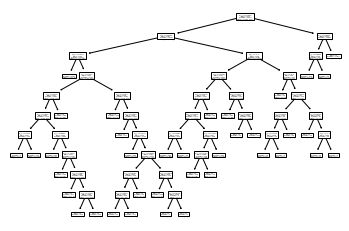

In [14]:
tree.plot_tree(model)

In [15]:
import matplotlib.pyplot as plt

[Text(660.7894736842105, 864.8181818181819, 'sepal length (cm) <= 13185.5\ngini = 0.212\nsamples = 25275\nvalue = [22233, 3042]\nclass = setosa'),
 Text(440.52631578947364, 782.4545454545455, 'petal length (cm) <= 10996.5\ngini = 0.352\nsamples = 13186\nvalue = [10176, 3010]\nclass = setosa'),
 Text(195.78947368421052, 700.0909090909091, 'petal length (cm) <= 6244.0\ngini = 0.164\nsamples = 11005\nvalue = [10013, 992]\nclass = setosa'),
 Text(171.31578947368422, 617.7272727272727, 'gini = 0.0\nsamples = 6261\nvalue = [6261, 0]\nclass = setosa'),
 Text(220.26315789473682, 617.7272727272727, 'sepal length (cm) <= 8215.5\ngini = 0.331\nsamples = 4744\nvalue = [3752, 992]\nclass = setosa'),
 Text(122.36842105263158, 535.3636363636364, 'sepal length (cm) <= 8027.5\ngini = 0.477\nsamples = 1960\nvalue = [1188, 772]\nclass = setosa'),
 Text(97.89473684210526, 453.0, 'sepal length (cm) <= 6389.5\ngini = 0.442\nsamples = 1772\nvalue = [1188, 584]\nclass = setosa'),
 Text(48.94736842105263, 370.

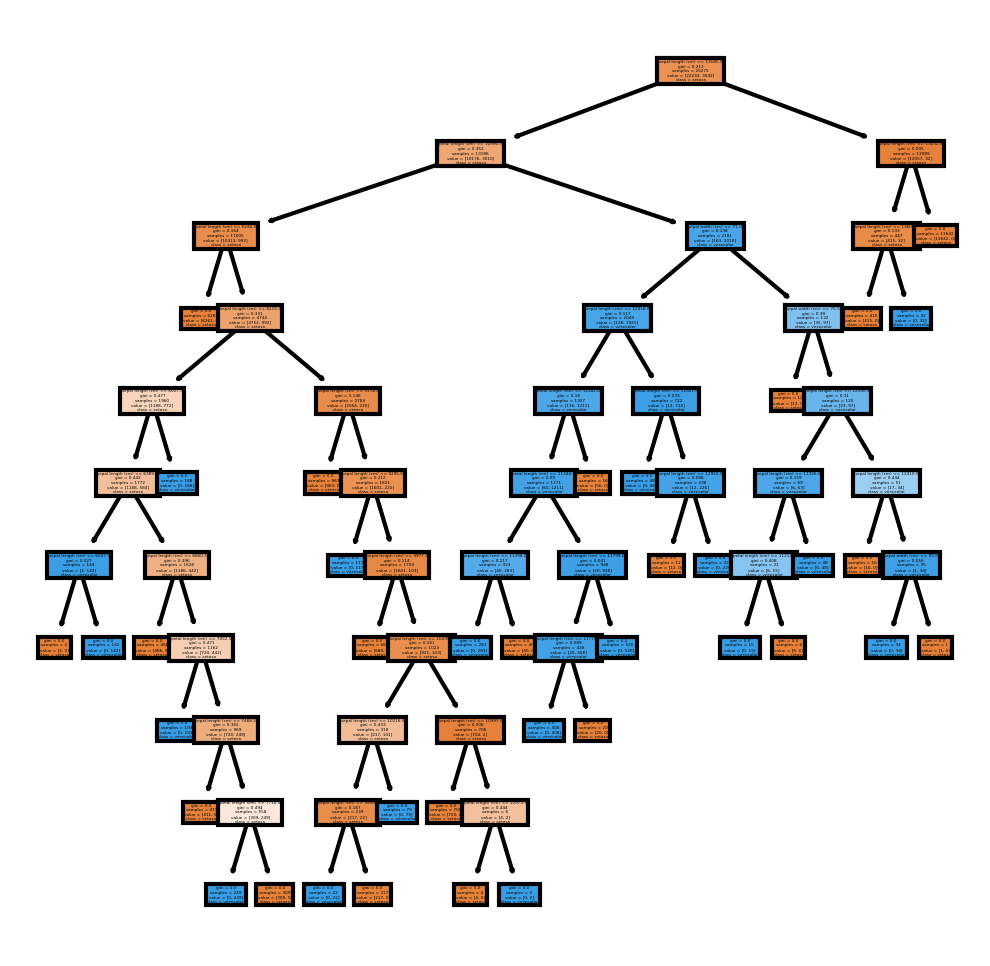

In [16]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [17]:
fig.savefig('imagename.png', epi=10000)

<ipython-input-17-f477ebdce0db>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "epi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('imagename.png', epi=10000)


In [18]:
from graphviz import Source
Source( tree.export_graphviz(model))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH